In [1]:
import pandas as pd

df = pd.read_csv('/content/Bengaluru_House_Data.csv')

print("First 5 rows of the DataFrame:")
print(df.head())

print("\nDataFrame Information:")
df.info()

First 5 rows of the DataFrame:
              area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0   Coomee       1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00  

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  --

In [2]:
print("Number of missing values in 'society' column:")
print(df['society'].isnull().sum())

print("\nValue counts for 'society' column (including NaN):")
print(df['society'].value_counts(dropna=False).head(20))

Number of missing values in 'society' column:
5502

Value counts for 'society' column (including NaN):
society
NaN        5502
GrrvaGr      80
PrarePa      76
Prtates      59
Sryalan      59
GMown E      56
Bhmesy       51
Prtanha      51
Prityel      50
Prarkun      49
PrityTr      49
Dhalsh       47
IBityin      45
SNity S      40
Soresea      39
Adeatlm      37
Soitya       36
Rosha I      35
Bhe 2ko      35
SunceEs      34
Name: count, dtype: int64


In [3]:
df['society'] = df['society'].fillna('NoSociety')

print("Number of missing values in 'society' column after imputation:")
print(df['society'].isnull().sum())

print("Value counts for 'society' column after imputation (top 5 including 'NoSociety'):")
print(df['society'].value_counts().head())

Number of missing values in 'society' column after imputation:
0
Value counts for 'society' column after imputation (top 5 including 'NoSociety'):
society
NoSociety    5502
GrrvaGr        80
PrarePa        76
Prtates        59
Sryalan        59
Name: count, dtype: int64


In [4]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1 (25th percentile): {Q1:.2f}")
print(f"Q3 (75th percentile): {Q3:.2f}")
print(f"IQR (Interquartile Range): {IQR:.2f}")
print(f"Lower bound for outliers: {lower_bound:.2f}")
print(f"Upper bound for outliers: {upper_bound:.2f}")

Q1 (25th percentile): 50.00
Q3 (75th percentile): 120.00
IQR (Interquartile Range): 70.00
Lower bound for outliers: -55.00
Upper bound for outliers: 225.00


In [5]:
outliers_price = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

print(f"Number of outliers in 'price' column: {len(outliers_price)}")
print("\nFirst 5 rows of identified price outliers:")
print(outliers_price.head())

Number of outliers in 'price' column: 1276

First 5 rows of identified price outliers:
               area_type   availability               location       size  \
7   Super built-up  Area  Ready To Move           Rajaji Nagar      4 BHK   
9             Plot  Area  Ready To Move           Gandhi Bazar  6 Bedroom   
11            Plot  Area  Ready To Move             Whitefield  4 Bedroom   
18  Super built-up  Area  Ready To Move  Ramakrishnappa Layout      3 BHK   
22            Plot  Area  Ready To Move            Thanisandra  4 Bedroom   

      society total_sqft  bath  balcony  price  
7     Brway G       3300   4.0      NaN  600.0  
9   NoSociety       1020   6.0      NaN  370.0  
11    Prrry M       2785   5.0      3.0  295.0  
18    PeBayle       2770   4.0      2.0  290.0  
22     Soitya       2800   5.0      2.0  380.0  


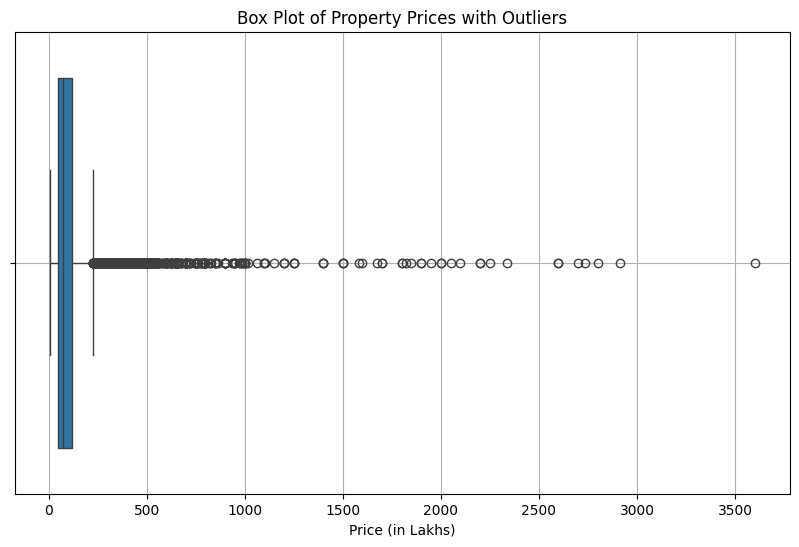

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Box Plot of Property Prices with Outliers')
plt.xlabel('Price (in Lakhs)')
plt.grid(True)
plt.show()


In [7]:
print(f"\nNumber of identified outliers in 'price' column: {len(outliers_price)}")

print("\nDescriptive statistics for 'price' column (full dataset):")
print(df['price'].describe())

print("\nDescriptive statistics for 'price' column (outliers only):")
print(outliers_price['price'].describe())


Number of identified outliers in 'price' column: 1276

Descriptive statistics for 'price' column (full dataset):
count    13320.000000
mean       112.565627
std        148.971674
min          8.000000
25%         50.000000
50%         72.000000
75%        120.000000
max       3600.000000
Name: price, dtype: float64

Descriptive statistics for 'price' column (outliers only):
count    1276.000000
mean      425.746865
std       324.368791
min       226.000000
25%       260.000000
50%       325.000000
75%       450.000000
max      3600.000000
Name: price, dtype: float64


In [8]:
df_cleaned = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

print(f"Original DataFrame row count: {len(df)}")
print(f"Number of price outliers dropped: {len(outliers_price)}")
print(f"Final cleaned DataFrame row count (after removing price outliers): {len(df_cleaned)}")

Original DataFrame row count: 13320
Number of price outliers dropped: 1276
Final cleaned DataFrame row count (after removing price outliers): 12044
